In [42]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

In [43]:
States = np.array([0,1]) 
Prior =  np.array([0.2,0.8])
T = np.array([[0.8,0.2],[0.2,0.8]])

E = np.array([[0.5,0.9],[0.5,0.1]])
E

array([[0.5, 0.9],
       [0.5, 0.1]])

In [44]:
DictH = {0:'Justa',1:'Sesgada'}
DictO= {0:'Cara',1:'Sello'}
Obs=np.array([1,0,0,0,1,0,1,0])



In [45]:
def GetStates(States,N):
    
    CStates = list( combinations_with_replacement(States,N) )
    
    print(CStates)
    
    Permu = []
    
    for it in CStates:
        p = list(permutations(it,N))
       # print(p)
        
        for i in p:
            if i not in Permu:
                Permu.append(i)
                
    return np.array(Permu)

In [46]:
HiddenStates = GetStates(States,8)

[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


In [47]:
def GetProb(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]
    
    # Matriz de transicion
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

In [48]:
P = np.zeros(HiddenStates.shape[0], dtype=np.float64)

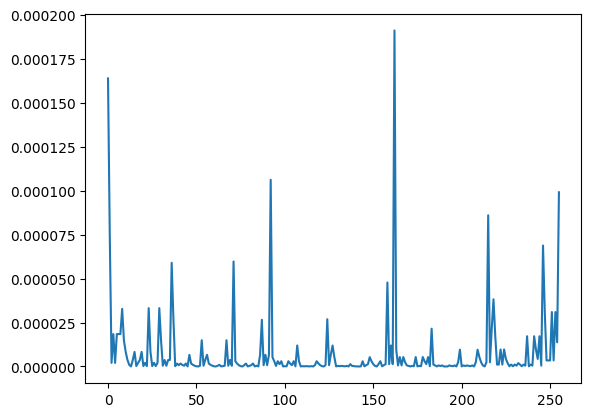

In [49]:
for i in range(P.shape[0]):
    P[i] = GetProb(T,E,Obs,HiddenStates[i],Prior)
    
plt.plot(P)

In [50]:
ii = np.where( P == np.amax(P))
print(HiddenStates[ii])

[[1 1 1 1 0 0 0 0]]


In [51]:
np.sum(P)

0.0019344381513984013

Este es el estado más probable, con 1=Sesgada y 0=Justa. También podemos ver la probabilidad Pi para este estado

In [52]:
ObsStates = GetStates([0,1],8)
ObsStates


[(0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 0, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1), (0, 0, 0, 0, 0, 1, 1, 1), (0, 0, 0, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 1, 1), (0, 0, 1, 1, 1, 1, 1, 1), (0, 1, 1, 1, 1, 1, 1, 1), (1, 1, 1, 1, 1, 1, 1, 1)]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [53]:
Nobs = ObsStates.shape[0]

PObs = np.zeros(Nobs)

for j in range(Nobs):
    
    dim = HiddenStates.shape[0]
    P = np.zeros(dim)
    
    for i in range(dim):
        P[i] = GetProb(T,E,ObsStates[j],HiddenStates[i],Prior)
        
    PObs[j] = np.sum(P)

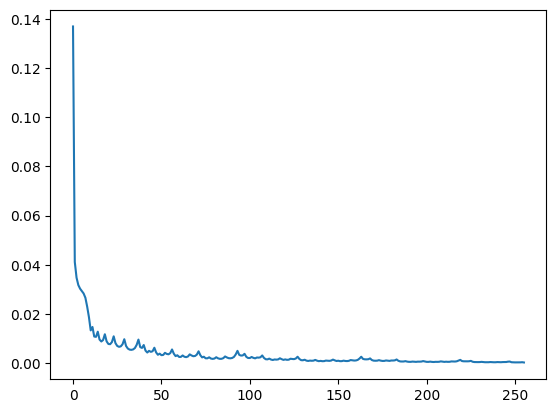

In [54]:
plt.plot(PObs)

In [55]:
ii = np.where( PObs == np.amax(PObs))
print(ObsStates[ii])

[[0 0 0 0 0 0 0 0]]


In [56]:
np.sum(PObs)

1.0000000000000007